# Tutorial for using the package `fast-ml` 

This package is as good as having a junior Data Scientist working for you. Most of the commonly used EDA steps, Missing Data Imputation techniques, Feature Engineering steps are covered in a ready to use format

## Part 4. Outlier Analysis and Treatment



#### 1. Import outlier_treatment module from the package fast_ml
`from fast_ml.outlier_treatment import check_outliers, OutlierTreatment`

#### 2. Check for outliers in the entire dataset
`outlier_df = check_outliers(train)`
<br>`outlier_df`

#### 3. Define the outlier object. 

`outlier_obj = OutlierTreatment(method = 'iqr', tol=1.5)`

#### 3. Fit the object on your dataframe and provide a list of variables
`outlier_obj.fit(train, ['MSSubClass'])`

#### 4. Apply the transform method on train / test dataset
`train = outlier_obj.transform(train)`
<br>&<br>
`test = outlier_obj.transform(test)`

#### 5. parameter dictionary gets created which store the values used for outlier treatment. It can be viewed as
`outlier_obj.param_dict_`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fast_ml.outlier_treatment import check_outliers, OutlierTreatment

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/house_prices.csv')
df.shape

(1460, 81)

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
numeric_type = ['float64', 'int64']
category_type = ['object']

## Start Outlier Treatment

## A. Check Outliers

In [6]:
check_outliers(df)

,lower_bound_outliers,upper_bound_outliers,total_outliers,perc_outliers
EnclosedPorch,0,208,208,14.246575
BsmtFinSF2,0,167,167,11.438356
OverallCond,31,94,125,8.561644
ScreenPorch,0,116,116,7.945205
MSSubClass,0,103,103,7.054795
MasVnrArea,0,96,96,6.575342
LotFrontage,42,46,88,6.027397
BsmtHalfBath,0,82,82,5.616438
OpenPorchSF,0,77,77,5.273973
LotArea,2,67,69,4.726027


## B. Outlier Treatment

### 1. MSSubClass

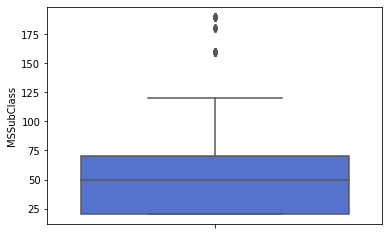

In [7]:
# Before Outlier Treatment
sns.boxplot(y = 'MSSubClass', data = df, color ='royalblue')
plt.show()

In [8]:
outlier_obj = OutlierTreatment(method = 'iqr', tol=1.5)
outlier_obj.fit(df, ['MSSubClass'])
outlier_obj.param_dict_

{'MSSubClass': {'lower_bound': -55.0, 'upper_bound': 145.0}}

In [9]:
df = outlier_obj.transform(df)

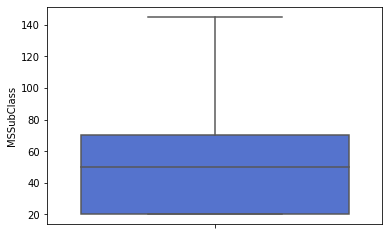

In [10]:
# After Outlier Treatment
sns.boxplot(y = 'MSSubClass', data = df, color ='royalblue')
plt.show()

In [4]:
outlier_obj2 = OutlierTreatment(method = 'iqr', tol=1.5)
outlier_obj2.fit(df)
outlier_obj2.param_dict_

{'Id': {'lower_bound': -728.5, 'upper_bound': 2189.5},
 'MSSubClass': {'lower_bound': -55.0, 'upper_bound': 145.0},
 'LotArea': {'lower_bound': 1481.5, 'upper_bound': 17673.5},
 'OverallQual': {'lower_bound': 2.0, 'upper_bound': 10.0},
 'OverallCond': {'lower_bound': 3.5, 'upper_bound': 7.5},
 'YearBuilt': {'lower_bound': 1885.0, 'upper_bound': 2069.0},
 'YearRemodAdd': {'lower_bound': 1911.5, 'upper_bound': 2059.5},
 'BsmtFinSF1': {'lower_bound': -1068.375, 'upper_bound': 1780.625},
 'BsmtFinSF2': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'BsmtUnfSF': {'lower_bound': -654.5, 'upper_bound': 1685.5},
 'TotalBsmtSF': {'lower_bound': 42.0, 'upper_bound': 2052.0},
 '1stFlrSF': {'lower_bound': 118.125, 'upper_bound': 2155.125},
 '2ndFlrSF': {'lower_bound': -1092.0, 'upper_bound': 1820.0},
 'LowQualFinSF': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'GrLivArea': {'lower_bound': 158.625, 'upper_bound': 2747.625},
 'BsmtFullBath': {'lower_bound': -1.5, 'upper_bound': 2.5},
 'BsmtHalfBath': {'l